In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
df = pd.read_csv("Student_Performance.csv")
# https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression

print(df.shape)
df.head()

(10000, 6)


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [42]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [43]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [45]:
df['Extracurricular Activities'].value_counts(normalize=True)

# If one class <10–15%, it’s imbalanced → you’ll handle it during preprocessing.

Extracurricular Activities
No     0.5052
Yes    0.4948
Name: proportion, dtype: float64

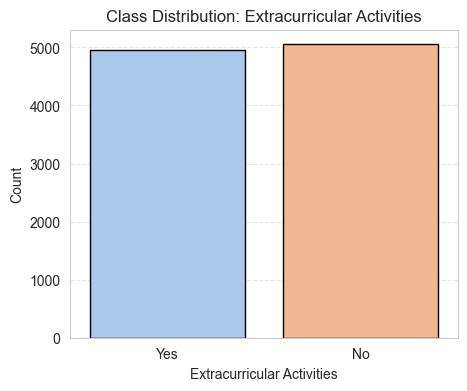

In [46]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=col, hue=col, palette='pastel', edgecolor='black', legend=False)
    plt.title(f"Class Distribution: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

In [47]:
# Cardinality Check
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")

Extracurricular Activities: 2 unique values


In [48]:
from scipy.stats import chi2_contingency

contingency = pd.crosstab(df['Extracurricular Activities'], df['Performance Index'])
chi2, p, dof, expected = chi2_contingency(contingency)
print("p-value:", p)

# Since p-values smaller than alpha = 0.05 than our cate_feature is useful 

p-value: 0.010244883931916032


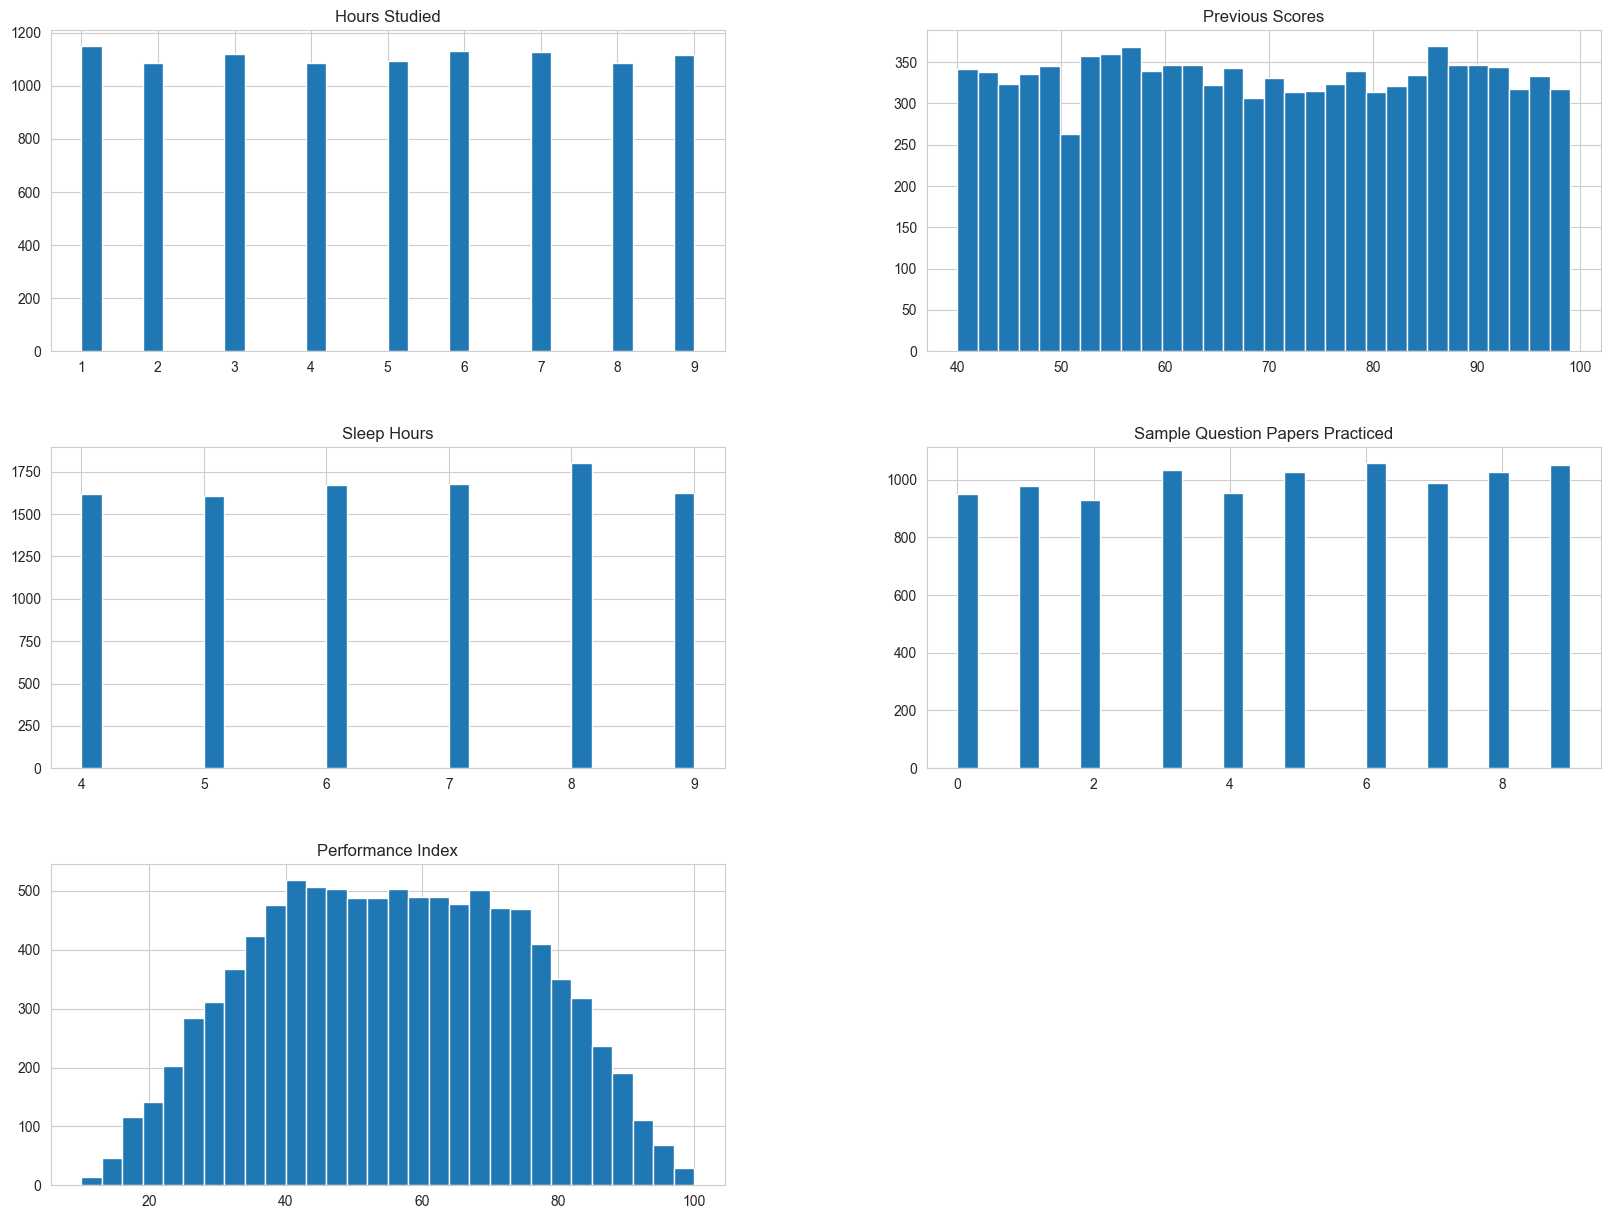

In [49]:
df.hist(bins=30, figsize=(20, 15))
plt.show()

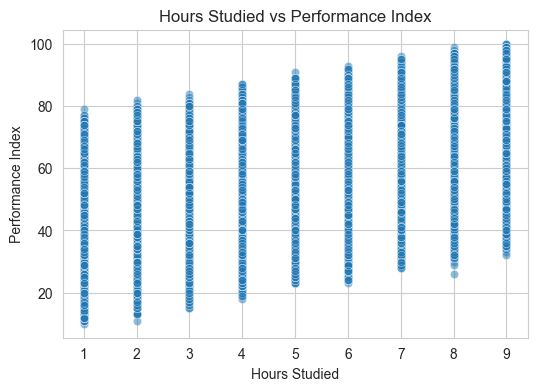

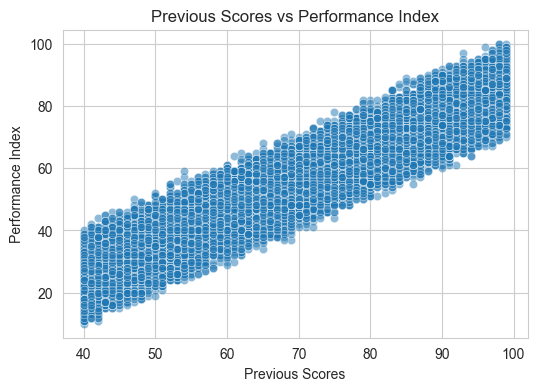

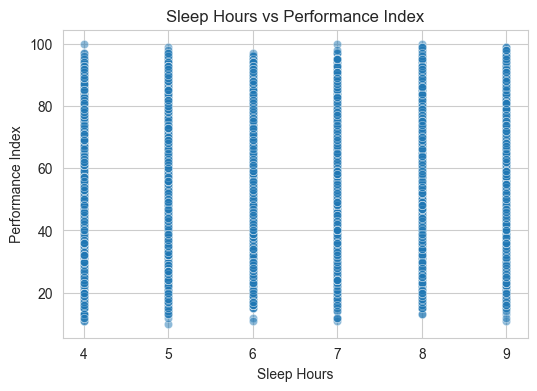

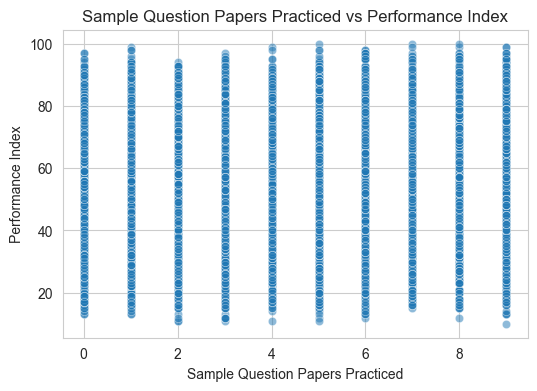

In [50]:
# Define target variable
target = 'Performance Index'

# Select only numerical features (excluding the target)
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features.remove(target)  # Remove target from feature list

# Set seaborn style
sns.set_style("whitegrid")

# Scatter plot each feature vs target
for feature in numerical_features:
    plt.figure(figsize=(6, 4))  # Create a new figure for each plot
    sns.scatterplot(x=df[feature], y=df[target], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f"{feature} vs {target}")
    plt.show()  # Show each plot separately

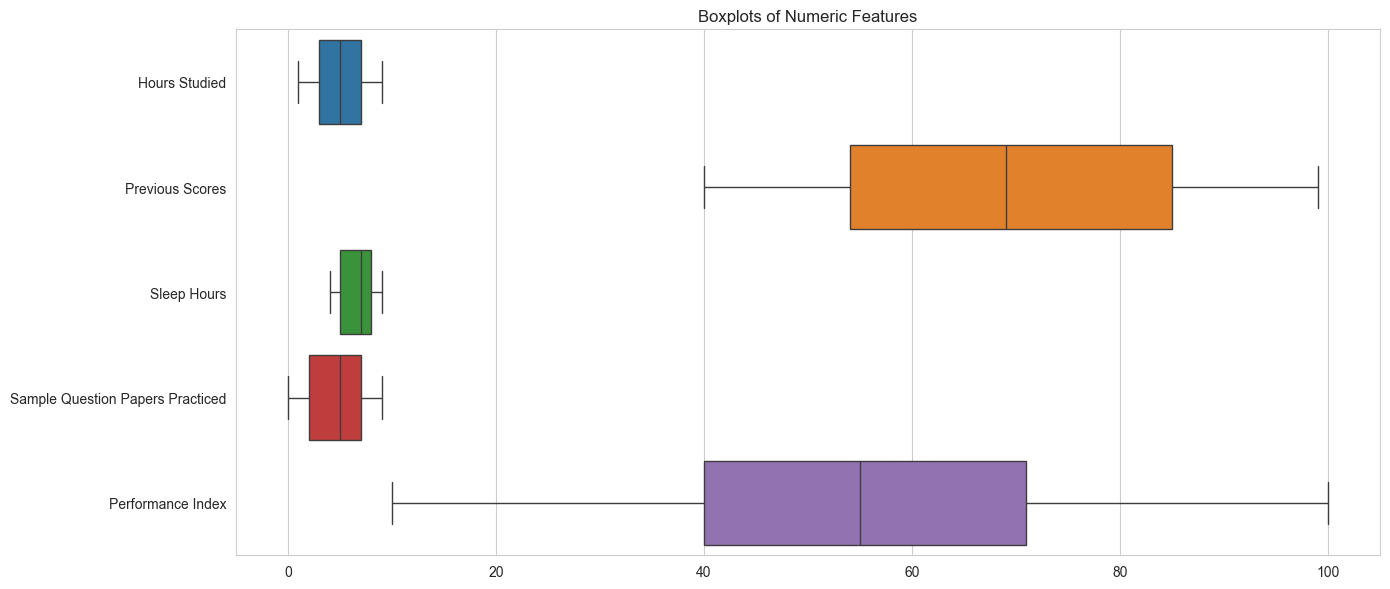

In [51]:
# Create one figure with all boxplots
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

plt.figure(figsize=(14, 6))
sns.boxplot(data=df[num_cols], orient='h')
plt.title("Boxplots of Numeric Features")
plt.tight_layout()
plt.show()

In [52]:
# Convert categorical 'Yes/No' to numeric 1/0
df['Extracurricular Activities'] = (df['Extracurricular Activities'] == 'Yes').astype(int)

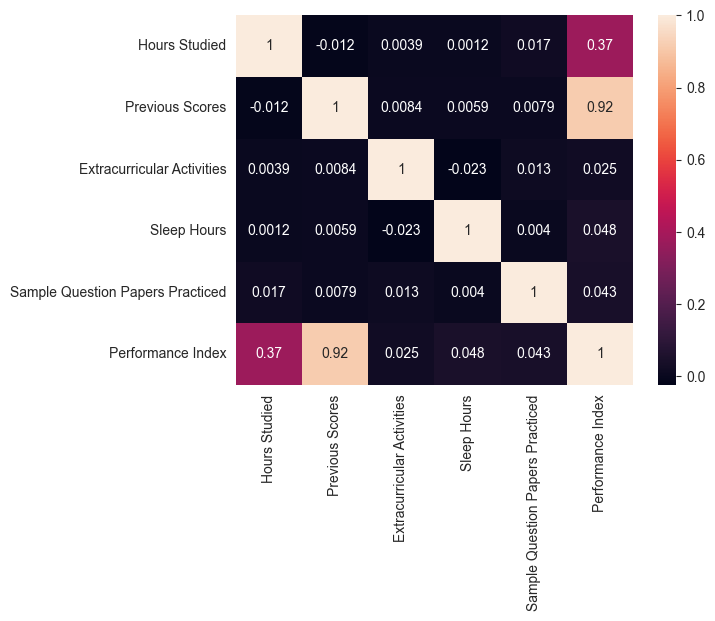

In [53]:
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [54]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [55]:
# Pipeline Train + Adjust R-Squared 

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

target = "Performance Index"

# Include the binary column in the candidate list
candidate_features = [
    "Previous Scores",
    "Hours Studied",
    "Sleep Hours",
    "Sample Question Papers Practiced",
    "Extracurricular Activities",   # <-- binary 0/1
]

numeric_cols = [
    "Previous Scores",
    "Hours Studied",
    "Sleep Hours",
    "Sample Question Papers Practiced",
]
binary_cols = [
    "Extracurricular Activities"     # 0/1 and *not* scaled
]


In [56]:
def adjusted_r2(y_true, y_pred, p):
    n = len(y_true)
    r2 = r2_score(y_true, y_pred)
    return 1 - (1 - r2) * ((n - 1) / (n - p - 1)), r2

In [57]:
from sklearn.model_selection import train_test_split
X = df[candidate_features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   k_features                                           features   R2_test  \
0           1                                  [Previous Scores]  0.840949   
1           2                   [Previous Scores, Hours Studied]  0.985809   
2           3      [Previous Scores, Hours Studied, Sleep Hours]  0.987741   
3           4  [Previous Scores, Hours Studied, Sleep Hours, ...  0.988705   
4           5  [Previous Scores, Hours Studied, Sleep Hours, ...  0.988978   

   Adj_R2_test   Test_MSE  
0     0.840869  58.941993  
1     0.985795   5.258903  
2     0.987723   4.542908  
3     0.988682   4.185752  
4     0.988950   4.084544  


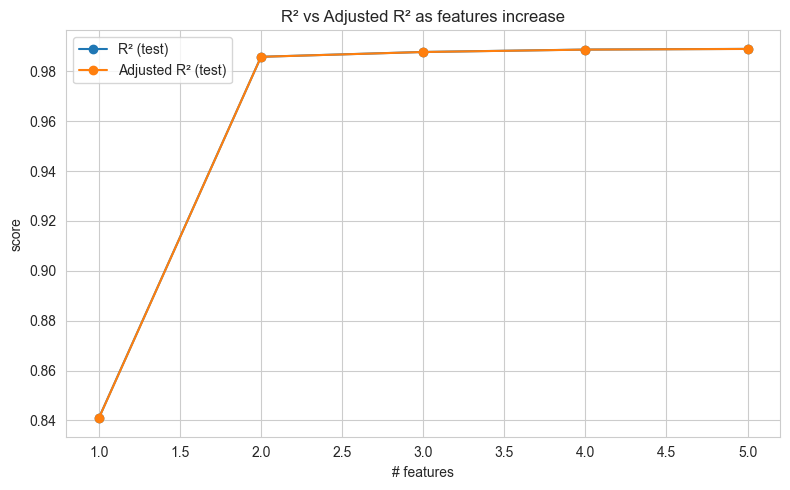

,k_features,features,R2_train,Adj_R2_train,R2_test,Adj_R2_test,Test_MSE
0,1,[Previous Scores],0.836700,0.836680,0.840949,0.840869,58.941993
1,2,"[Previous Scores, Hours Studied]",0.985865,0.985862,0.985809,0.985795,5.258903
2,3,"[Previous Scores, Hours Studied, Sleep Hours]",0.987621,0.987617,0.987741,0.987723,4.542908
3,4,"[Previous Scores, Hours Studied, Sleep Hours, ...",0.988438,0.988432,0.988705,0.988682,4.185752
4,5,"[Previous Scores, Hours Studied, Sleep Hours, ...",0.988689,0.988682,0.988978,0.988950,4.084544


In [ ]:
base_sgd = SGDRegressor(
    loss="squared_error", # MSE 
    learning_rate="invscaling",
    eta0=0.1,
    power_t=0.5,
    penalty=None,
    random_state=42,
    max_iter=2000,
    tol=1e-6, # MSE_now - MSE_pre = 10^-6 
)

results = []
for k in range(1, len(candidate_features) + 1):
    cols = candidate_features[:k] # Take the first element from the list until k-th

    cur_numeric = [c for c in cols if c in numeric_cols]
    cur_binary  = [c for c in cols if c in binary_cols]

    cur_preproc = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), cur_numeric),
            ("bin", "passthrough", cur_binary),
        ],
        remainder="drop",
    )

    pipe = make_pipeline(cur_preproc, base_sgd)  # (data_prep, model)
    pipe.fit(X_train[cols], y_train)

    y_tr = pipe.predict(X_train[cols])
    y_te = pipe.predict(X_test[cols])

    adj_tr, r2_tr = adjusted_r2(y_train, y_tr, p=len(cols))
    adj_te, r2_te = adjusted_r2(y_test,  y_te, p=len(cols))
    mse_te = mean_squared_error(y_test, y_te)

    results.append({
        "k_features": k,
        "features": cols,
        "R2_train": r2_tr,
        "Adj_R2_train": adj_tr,
        "R2_test": r2_te,
        "Adj_R2_test": adj_te,
        "Test_MSE": mse_te
    })

res_df = pd.DataFrame(results)
print(res_df[["k_features","features","R2_test","Adj_R2_test","Test_MSE"]])

# Optional plot
plt.figure(figsize=(8,5))
plt.plot(res_df["k_features"], res_df["R2_test"], marker="o", label="R² (test)")
plt.plot(res_df["k_features"], res_df["Adj_R2_test"], marker="o", label="Adjusted R² (test)")
plt.xlabel("# features"); plt.ylabel("score"); plt.title("R² vs Adjusted R² as features increase")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

res_df

Because in this loop, We are testing 1 feature → 2 features → 3 features → …
So We cannot use all numeric/binary features at once.

We need only the features chosen at this step.

🔥 Iteration 1

means:

🔥 Iteration 1

cols = candidate_features[:1]
→ Train using only the 1st feature

🔥 Iteration 2

cols = candidate_features[:2]
→ Train using the first 2 features

🔥 Iteration 3

cols = candidate_features[:3]
→ Train using the first 3 features

🔥 Iteration k

cols = candidate_features[:k]
→ Train using the first k features

🔥 Final iteration

cols = candidate_features[:len(candidate_features)]
→ Train using ALL featurescols = candidate_features[:1]
→ Train using only the 1st feature

🔥 Iteration 2

cols = candidate_features[:2]
→ Train using the first 2 features

🔥 Iteration 3

cols = candidate_features[:3]
→ Train using the first 3 features

🔥 Iteration k

cols = candidate_features[:k]
→ Train using the first k features

🔥 Final iteration

cols = candidate_features[:len(candidate_features)]
→ Train using ALL features

In [ ]:
final_features = ["Previous Scores", "Hours Studied"]
final_pipe = make_pipeline(
    ColumnTransformer([
        ("num", StandardScaler(), [f for f in final_features if f in numeric_cols])
    ]), # data_pre
    base_sgd # model 
)
final_pipe.fit(X_train[final_features], y_train)

import joblib
joblib.dump(final_pipe, "student_performance_model.pkl")

['student_performance_model.pkl']

In [60]:
print(cur_numeric)
print(cur_binary)

['Previous Scores', 'Hours Studied', 'Sleep Hours', 'Sample Question Papers Practiced']
['Extracurricular Activities']


In [61]:
print(cur_preproc)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['Previous Scores', 'Hours Studied',
                                  'Sleep Hours',
                                  'Sample Question Papers Practiced']),
                                ('bin', 'passthrough',
                                 ['Extracurricular Activities'])])
